In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from house_prices_kaggle.utils import Utils

In [13]:
utils = Utils() 

In [34]:
df = pd.read_csv('../../data/clean_data/train_df_preprocessed.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No feature,0,12,2008,WD,Normal,250000


*Initial Data Overview*

In [33]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


*Univariate Analysis of the Target Feature*

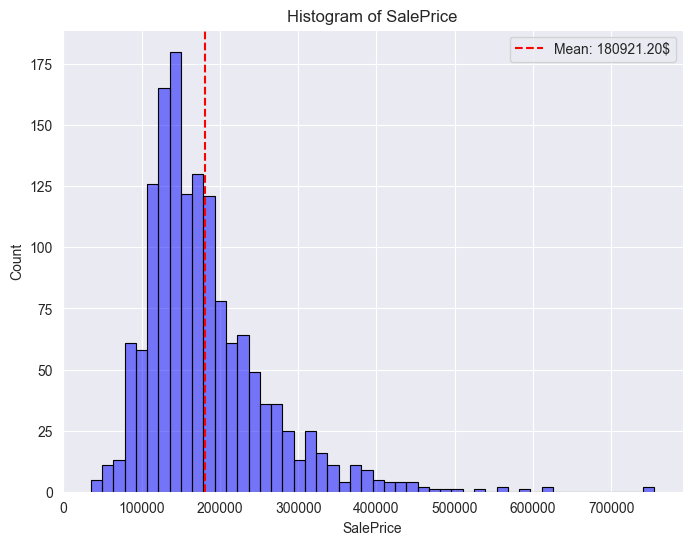

In [39]:
target_feature = 'SalePrice'
plt.figure(figsize=(8, 6))
sns.histplot(df[target_feature], color='blue', bins=50, edgecolor='black', alpha=0.5)
plt.axvline(df[target_feature].mean(), color='red', linestyle='--', label=f'Mean: {df[target_feature].mean():.2f}$')
plt.legend(loc='upper right')
plt.title(f'Histogram of {target_feature}')
plt.show()

Histogram for `SalePrice` shows a right-skewed distribution, with most houses are priced below the mean

*Univariate Analysis of key numerical features*

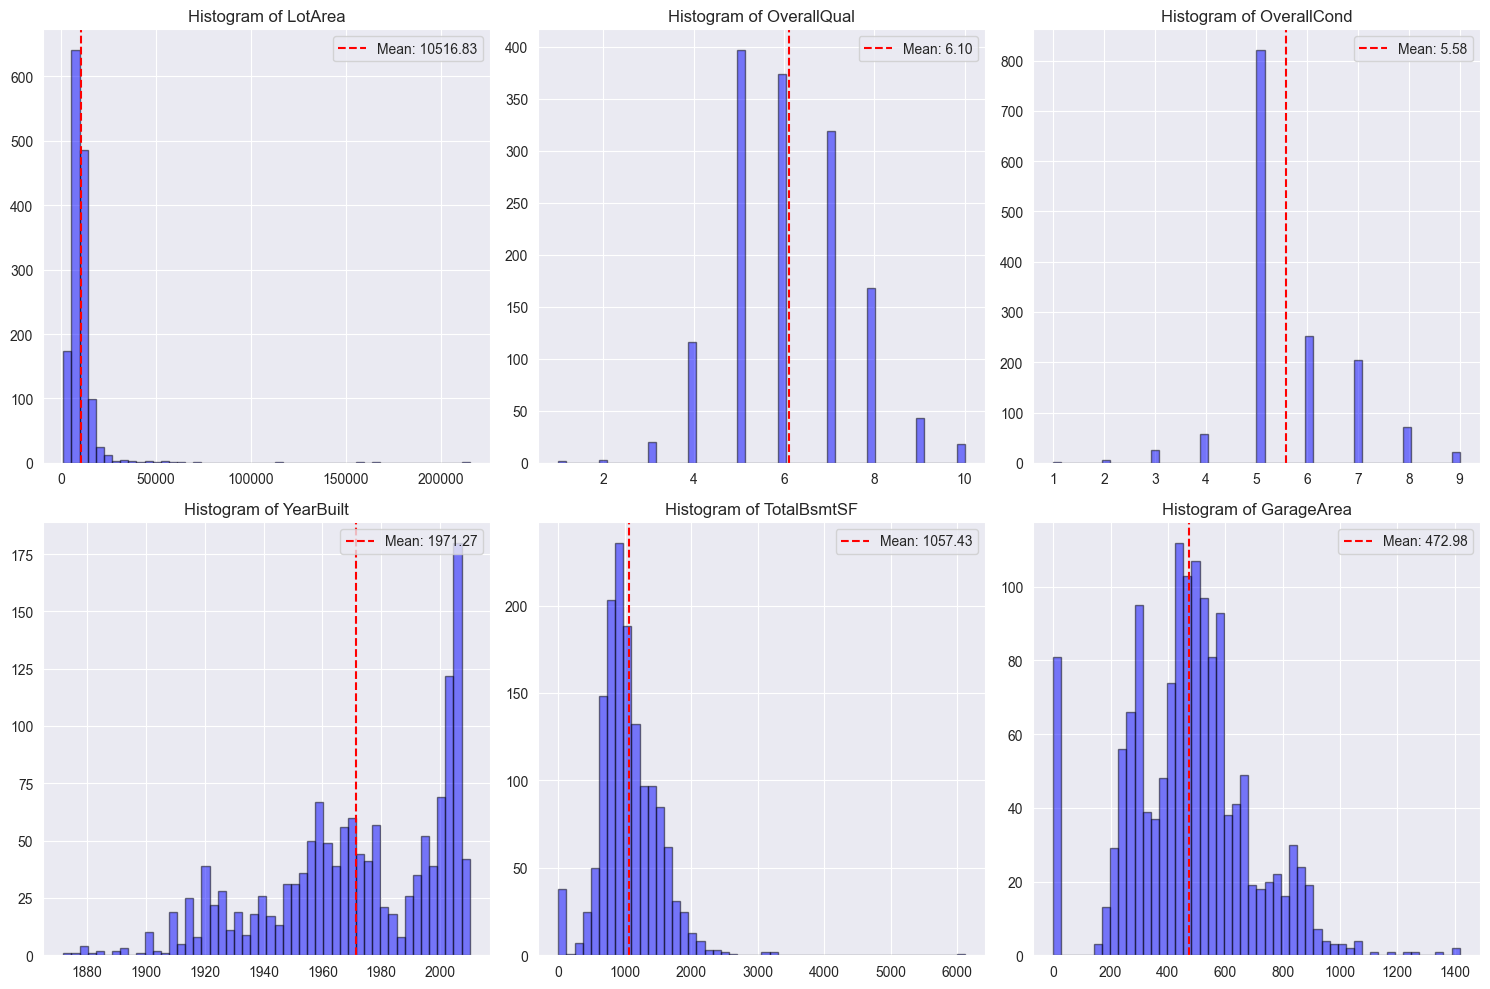

In [43]:
key_numerical_features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GarageArea']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_numerical_features, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[feature], bins=50, color='blue', edgecolor='black', alpha=0.5)
    plt.axvline(df[feature].mean(), color='red', linestyle='--', label=f'Mean: {df[feature].mean():.2f}')
    plt.title(f'Histogram of {feature}')
    plt.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

6